<p><img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="40px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Proyecto 1: Análisis estadístico</center></font></h1>
<h2><font color='0B5345'> <center>
Proyecto 2024-02 </center></font></h2>
<h3><font color='0B5345'> <center>
Natalia Arenas Pachón - Daniel Tamayo </center></font></h3>
<h3><font color='0B5345'> <center>
2024 </center></font></h3>
<font  face="Courier New" size="3">
<p1><center> </center></p1>

### **Contexto del problema**
Las enfermedades neurodegenerativas a menudo afectan la marcha y la movilidad. Para comprender mejor la fisiopatología de estas enfermedades y mejorar nuestra capacidad de medir las respuestas a las intervenciones terapéuticas, puede resultar útil cuantificar con precisión la dinámica de la marcha (https://physionet.org/content/gaitndd/1.0.0/).

### **Consulta**

1. Consultar para enfermedad de Parkinson, Huntington y Esclerosis Lateral Amiotrófica cómo se diagnostican y el reto que existe para el diagnóstico temprano de dichas enfermedades **(5%).**

##### **Enfermedad de Parkinson** 

**Diagnostico:**

**Reto:**

https://www.nia.nih.gov/espanol/parkinson/enfermedad-parkinson-causas-sintomas-tratamientos#:~:text=Diagn%C3%B3stico%20de%20la%20enfermedad%20de%20Parkinson,-Actualmente%2C%20no%20existen&text=Por%20lo%20general%2C%20los%20m%C3%A9dicos,que%20la%20persona%20tiene%20Parkinson.

##### **Enfermedad de Huntington**

**Diagnostico:**

**Reto:**


##### **Enfermedad de Esclerosis lateral amiotrófica**

**Diagnostico:**

**Reto:**


**2.** Discutir matemáticamente, explicando con fórmulas, cómo funciona la rutina detrend de scipy **(5%)

**3.** Discutir matemáticamente, explicando con fórmulas, cómo funciona el filtro hampel **(5%)**

**4.** Discutir matemáticamente y desde la bioingeniería qué mide la entropia de permutación ( https://www.aptech.com/blog/permutation-entropy/ , https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8051436/ ) **(5%)**

### **Organización de datos**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import os
import glob
import scipy.io as sio;

In [37]:
import os
directorio_actual=os.getcwd()
print(directorio_actual)

c:\Users\natal\OneDrive\Escritorio\LaboratorioBiosenales\Proyecto_1


In [38]:
archivos=os.listdir(directorio_actual + "/gait-in-neurodegenerative-disease-database-1.0.0")
print(len(archivos))

326


### **Programación**

1. Crear una rutina que permita cargar un archivo .ts y extraiga las 4 señales de interés, de cada señal elimine los primeros 20 segundos, y las almacene en un ndarray.

In [40]:
#AQUI SE EXTRAEN SOLO LOS ARCHIVOS .TS DE LA CARPETA
archivos = (directorio_actual + "/gait-in-neurodegenerative-disease-database-1.0.0")

archivos_ts = glob.glob(os.path.join(archivos, '*.ts'))
#list(filter(os.path.isfile, os.listdir(archivos)))
print(len(archivos_ts))

#archivos
#als#.ts son 13 en total
#control#.ts son 16 en total
#hunt#.ts son 20 en total
#park#.ts son 15 en total
#64 en total check

# for file in archivos_ts:
#     print(file)

64


In [50]:
#AQUÍ SEPARO CADA ARCHIVO PARA CADA CONJUNTO DE DATOS

#ALS
archivos_als = [archivo for archivo in archivos_ts if os.path.basename(archivo).startswith('als')]

names= ['Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)', 'Left Swing Interval (sec)',
'Right Swing Interval (sec)',	'Left Swing Interval (% of stride)', 'Right Swing Interval (% of stride)', 'Left Stance Interval (sec)', 'Right Stance Interval (sec)', 'Left Stance Interval (% of stride)',
'Right Stance Interval (% of stride)', 'Double Support Interval (sec)',	'Double Support Interval (% of stride)']

als = {}
listals = []
for file in archivos_als:
    datos_als = pd.read_csv(file,delimiter='\t',names=names)

    
#HUNT
archivos_hunt = [archivo for archivo in archivos_ts if os.path.basename(archivo).startswith('hunt')]
for file in archivos_hunt:
    datos_hunt = pd.read_csv(file,delimiter='\t',names=names)
    
    
#PARK
archivos_park = [archivo for archivo in archivos_ts if os.path.basename(archivo).startswith('park')]
for file in archivos_park:
    datos_park = pd.read_csv(file,delimiter='\t',names=names)
    
    
#CONTROL
archivos_control = [archivo for archivo in archivos_ts if os.path.basename(archivo).startswith('control')]
for file in archivos_control:
    datos_control = pd.read_csv(file,delimiter='\t',names=names)

In [65]:
#Visualizo datos control en el dataframe
datos_control.head()

,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride)
0,21.6633,1.0033,0.9900,0.3600,0.3733,35.88,37.71,0.6433,0.6167,64.12,62.29,0.2700,26.91
1,22.6633,1.0000,0.9867,0.3800,0.3700,38.00,37.50,0.6200,0.6167,62.00,62.50,0.2500,25.00
2,23.6800,1.0167,0.9967,0.3767,0.3567,37.05,35.79,0.6400,0.6400,62.95,64.21,0.2833,27.87
3,24.6867,1.0067,1.0200,0.3767,0.3567,37.42,34.97,0.6300,0.6633,62.58,65.03,0.2733,27.15
4,25.7100,1.0233,1.0233,0.3733,0.3767,36.48,36.81,0.6500,0.6467,63.52,63.19,0.2733,26.71


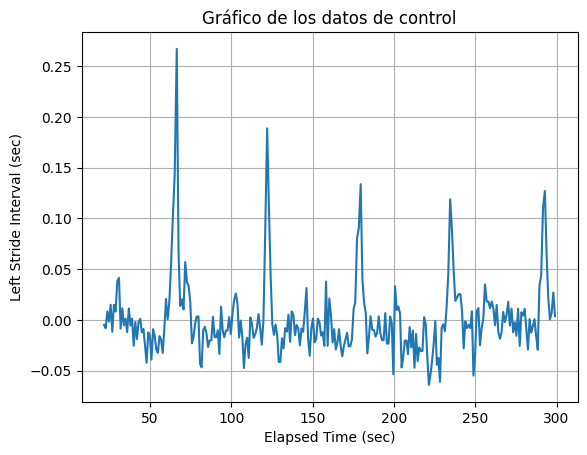

In [66]:
#Grafico los datos de control
tiempo = datos_control['Elapsed Time (sec)'].values
lsi = datos_control['Left Stride Interval (sec)'].values
type(lsi)


#NO SE SI SE ESTAN VISUALIZANDO TODOS


plt.plot(tiempo,signal.detrend(lsi))
plt.title('Gráfico de los datos de control')
plt.xlabel('Elapsed Time (sec)')
plt.ylabel('Left Stride Interval (sec)')
plt.grid()
plt.show()

In [60]:
#Visualizo datos als en el dataframe
datos_als.head()


,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride)
0,22.6033,1.1600,1.1567,0.4233,0.4233,36.49,36.60,0.7367,0.7333,63.51,63.40,0.3133,27.01
1,23.7833,1.1800,1.1833,0.4300,0.4567,36.44,38.59,0.7500,0.7267,63.56,61.41,0.2933,24.86
2,24.9233,1.1400,1.1433,0.4067,0.4133,35.67,36.15,0.7333,0.7300,64.33,63.85,0.3200,28.07
3,26.0600,1.1367,1.1500,0.3933,0.4200,34.60,36.52,0.7433,0.7300,65.40,63.48,0.3233,28.45
4,27.2533,1.1933,1.1533,0.4367,0.4267,36.59,36.99,0.7567,0.7267,63.41,63.01,0.3300,27.65


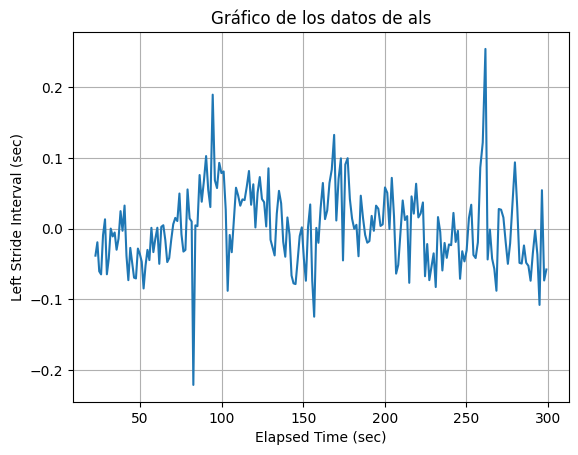

In [59]:
#Grafico los datos de als
tiempo = datos_als['Elapsed Time (sec)'].values
lsi = datos_als['Left Stride Interval (sec)'].values
type(lsi)


#NO SE SI SE ESTAN VISUALIZANDO TODOS


plt.plot(tiempo,signal.detrend(lsi))
plt.title('Gráfico de los datos de als')
plt.xlabel('Elapsed Time (sec)')
plt.ylabel('Left Stride Interval (sec)')
plt.grid()
plt.show()

In [61]:
#Visualizo datos hunt en el dataframe
datos_hunt.head()

,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride)
0,22.3700,1.1167,1.1167,0.4167,0.3567,37.31,31.94,0.7000,0.7600,62.69,68.06,0.3433,30.75
1,23.4900,1.1200,1.1200,0.4167,0.3800,37.20,33.93,0.7033,0.7400,62.80,66.07,0.3233,28.87
2,24.5733,1.0833,1.0900,0.3900,0.3100,36.00,28.44,0.6933,0.7800,64.00,71.56,0.3833,35.38
3,25.6500,1.0767,1.1000,0.3833,0.3567,35.60,32.42,0.6933,0.7433,64.40,67.58,0.3367,31.27
4,26.7600,1.1100,1.0933,0.3700,0.3233,33.33,29.57,0.7400,0.7700,66.67,70.43,0.4167,37.54


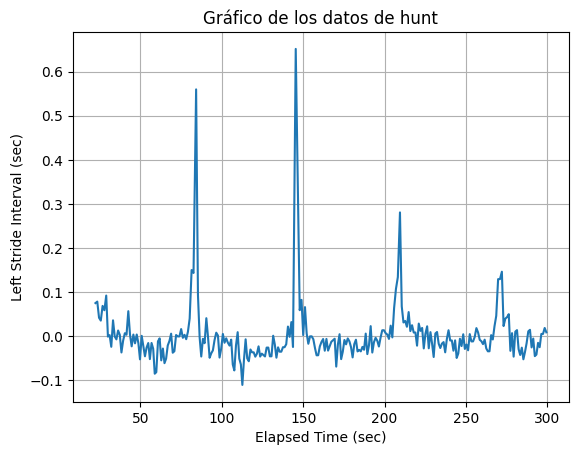

In [62]:
#Grafico los datos de hunt
tiempo = datos_hunt['Elapsed Time (sec)'].values
lsi = datos_hunt['Left Stride Interval (sec)'].values
type(lsi)


#NO SE SI SE ESTAN VISUALIZANDO TODOS


plt.plot(tiempo,signal.detrend(lsi))
plt.title('Gráfico de los datos de hunt')
plt.xlabel('Elapsed Time (sec)')
plt.ylabel('Left Stride Interval (sec)')
plt.grid()
plt.show()

In [63]:
#Visualizo datos park en el dataframe
datos_park.head()

,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride)
0,22.4633,1.3200,1.2800,0.4900,0.4833,37.12,37.76,0.8300,0.7967,62.88,62.24,0.3467,26.26
1,23.7767,1.3133,1.3200,0.4667,0.4567,35.53,34.60,0.8467,0.8633,64.47,65.40,0.3900,29.70
2,25.0333,1.2567,1.2900,0.4500,0.4500,35.81,34.88,0.8067,0.8400,64.19,65.12,0.3567,28.38
3,26.3100,1.2767,1.2567,0.4733,0.4633,37.08,36.87,0.8033,0.7933,62.92,63.13,0.3400,26.63
4,27.5800,1.2700,1.2767,0.4367,0.4433,34.38,34.73,0.8333,0.8333,65.62,65.27,0.3900,30.71


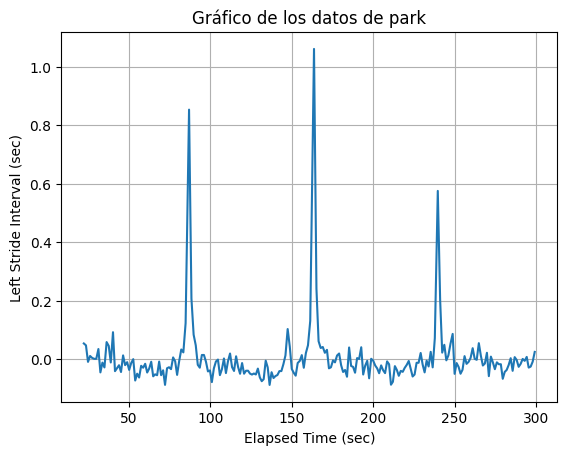

In [64]:
#Grafico los datos de park
tiempo = datos_park['Elapsed Time (sec)'].values
lsi = datos_park['Left Stride Interval (sec)'].values
type(lsi)


#NO SE SI SE ESTAN VISUALIZANDO TODOS


plt.plot(tiempo,signal.detrend(lsi))
plt.title('Gráfico de los datos de park')
plt.xlabel('Elapsed Time (sec)')
plt.ylabel('Left Stride Interval (sec)')
plt.grid()
plt.show()

In [43]:
#ELIMINO LOS 20 PRIMEROS SEGUNDOS DE CADA SEÑAL

In [44]:
#ALMACENO EN UN NDARRAY

2. Para cada señal eliminar los errores en tendencia usando la rutina detrend.

In [45]:
#

3. Para cada señal resultante del paso 2 eliminar los datos atípicos usando filtro hampel

In [46]:
#

4. Crear una función que reciba una señal de marcha y calcule el coeficiente de variación (CV) y la SD tal como se define en el artículo de referencia.

In [47]:
#

5. Crear una función que reciba una señal de marcha y permita calcular la entropía de permutación **(10%)**

In [48]:
#

6. Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 1 y almacene los resultados en un dataframe donde se pueda discriminar nombre participante, condición (Parkinson, Huntington, ELA, Control) y los tres índices/características calculados por cada señal

In [49]:
#

### **Discusión**
a. Discusión de las diferencias en los grupos usando las gráficas obtenidas usando estadística descriptiva **(25%)**

b. Planteamiento de las hipótesis nulas y alternativas **(5%)**, selección del tipo de prueba (paramétrica o no paramétrica) **(10%)** y discusión de los resultados **(10%)**


c. Discutir los resultados obtenidos con los presentado en el artículo base **(10%)**


d. Proponer cuales de las medidas usadas podrían servir para discriminar que poblaciones clínicas de los controles **(10%)**